In [1]:
import pandas as pd
import numpy as np
from gtda.plotting import plot_heatmap
from sklearn.model_selection import train_test_split
from gtda.images import Binarizer
import matplotlib.pyplot as plt
import gudhi as gd
import random
from matplotlib.patches import Circle
from matplotlib.widgets import Slider
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gtda.homology import CubicalPersistence
from gtda.diagrams import Scaler
from sklearn.pipeline import make_pipeline, make_union
from gtda.diagrams import PersistenceEntropy
from gtda.images import HeightFiltration
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from gtda.diagrams import Amplitude

In [2]:
DATA =pd.read_csv('mnist_784_csv.csv')

In [3]:
Y=DATA['class']
X=DATA.drop('class',axis=1)
X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

In [4]:
X = np.array(X).reshape((-1, 28, 28))
X.shape

(70000, 28, 28)

In [5]:
im_idx = np.flatnonzero(Y == 4)[0]
img = X[im_idx]
plot_heatmap(img)

In [6]:
im= X[im_idx][None, :,:]
binarizer = Binarizer(threshold=0.5)
im_binarized = binarizer.fit_transform(im)
im_binarized

array([[[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, Fal

In [7]:
binarizer.plot(im_binarized)

In [21]:
black_points=[]
for i in range(len(im_binarized[0])):
    for j in range(len(im_binarized[0][i])):
        if im_binarized[0][i][j]==True:
            black_points.append([j,i])

In [23]:
reduces_black_points=random.sample(black_points,42)

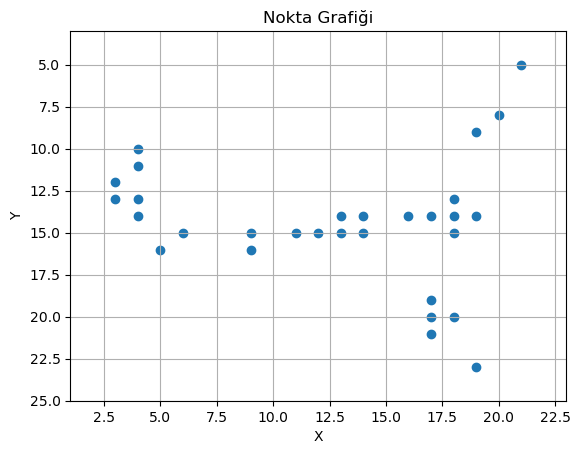

In [24]:
x = [point[0] for point in reduces_black_points]
y = [point[1] for point in reduces_black_points]

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nokta Grafiği')
plt.grid(True)
plt.axis([min(x)-2, max(x)+2, max(y)+2, min(y)-2])


plt.show()

In [25]:
ac = gd.AlphaComplex(points=reduces_black_points)

stree = ac.create_simplex_tree()
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension  2  -  163  simplices -  30  vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[2, 5] -> 0.25
[2, 6] -> 0.25
[4, 8] -> 0.25
[10, 12] -> 0.25
[4, 13] -> 0.25
[1, 14] -> 0.25
[3, 14] -> 0.25
[13, 15] -> 0.25
[4, 16] -> 0.25
[15, 16] -> 0.25
[10, 18] -> 0.25
[10, 19] -> 0.25
[2, 22] -> 0.25
[10, 23] -> 0.25
[17, 23] -> 0.25
[20, 24] -> 0.25
[1, 25] -> 0.25
[9, 28] -> 0.25
[8, 29] -> 0.25
[1, 3] -> 0.50
[0, 7] -> 0.50
[1, 3, 14] -> 0.50
[4, 15] -> 0.50
[4, 13, 15] -> 0.50
[8, 16] -> 0.50
[4, 8, 16] -> 0.50
[4, 15, 16] -> 0.50
[12, 19] -> 0.50
[10, 12, 19] -> 0.50
[18, 19] -> 0.50
[10, 18, 19] -> 0.50
[5, 22] -> 0.50
[2, 5, 22]

usetex mode requires TeX.


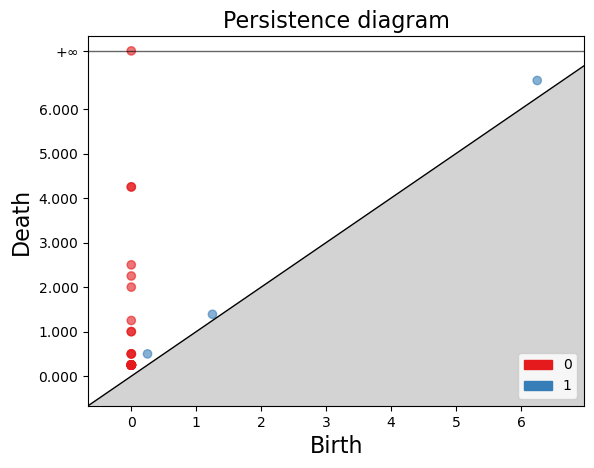

In [26]:
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm, legend = True)
plt.show()

In [27]:
im_simplicial=[[]]
for i in dgm:
    if i[1][1]!=float("inf"):
        im_simplicial[0].append([i[1][0],i[1][1],i[0]])

In [28]:
from gtda.diagrams import Scaler

scaler = Scaler()
im_scaled = scaler.fit_transform(im_simplicial)

scaler.plot(im_scaled)

In [29]:
from gtda.diagrams import HeatKernel

heat = HeatKernel(sigma=.15, n_bins=60, n_jobs=-1)
im_heat = heat.fit_transform(im_scaled)

# Visualise the heat kernel for H1
heat.plot(im_heat, homology_dimension_idx=1, colorscale='jet')

In [30]:
def get_20_pd(sayi):
    binarizer = Binarizer(threshold=0.5)
    for i in range(20):
        
        im_idx = np.flatnonzero(Y == sayi)[random.randint(0,len(np.flatnonzero(Y == sayi)))]
        img = X[im_idx].reshape(28,28)
        im = X[im_idx][None, :, :]
        
        im_binarized = binarizer.fit_transform(im)
        black_points=[]
        for i in range(len(im_binarized[0])):
            for j in range(len(im_binarized[0][i])):
                if im_binarized[0][i][j]==True:
                    black_points.append([j,i])
                    
        reduced_black_points=random.sample(black_points,42)
        x = [point[0] for point in reduced_black_points]
        y = [point[1] for point in reduced_black_points]

        plt.scatter(x, y)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Nokta Grafiği')
        plt.grid(True)
        plt.axis([min(x)-2, max(x)+2, max(y)+2, min(y)-2])


        plt.show()
        
        ac = gd.AlphaComplex(points=reduced_black_points)
        stree = ac.create_simplex_tree()
        
        dgm = stree.persistence()
        gd.plot_persistence_diagram(dgm, legend = True)
        plt.show()
        

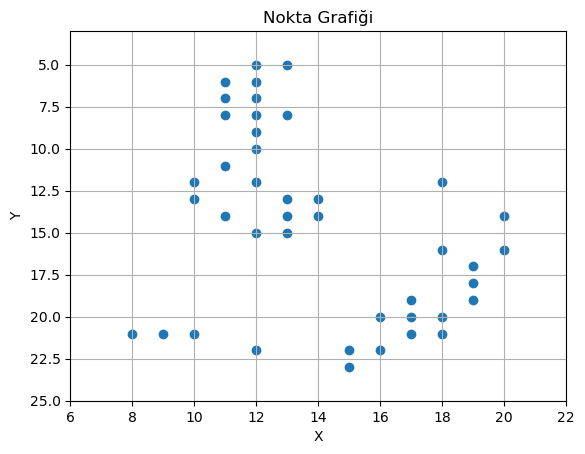

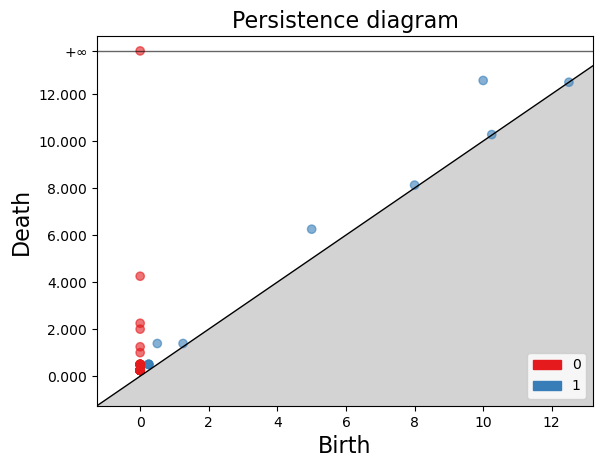

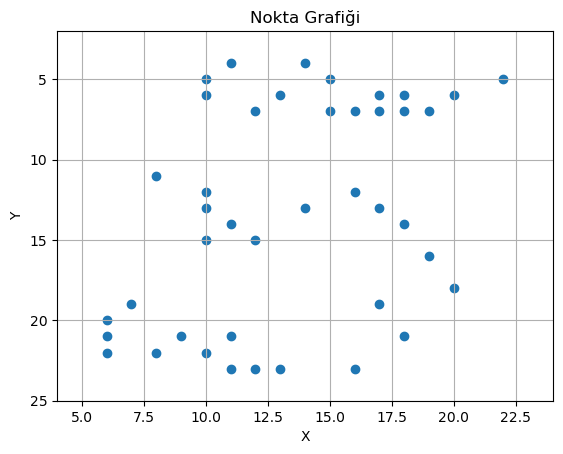

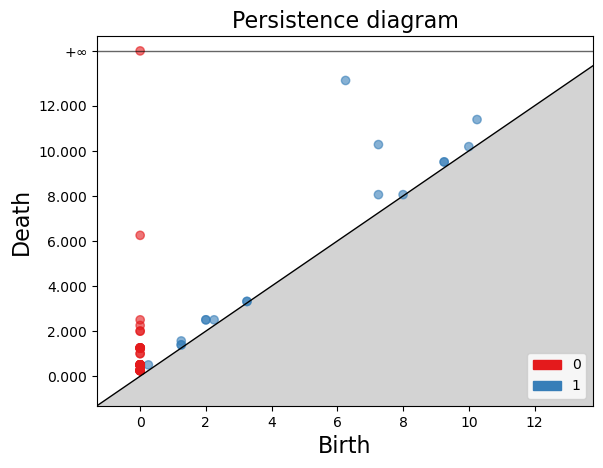

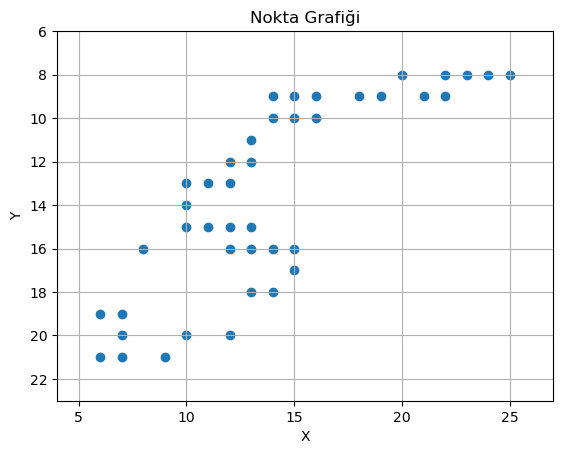

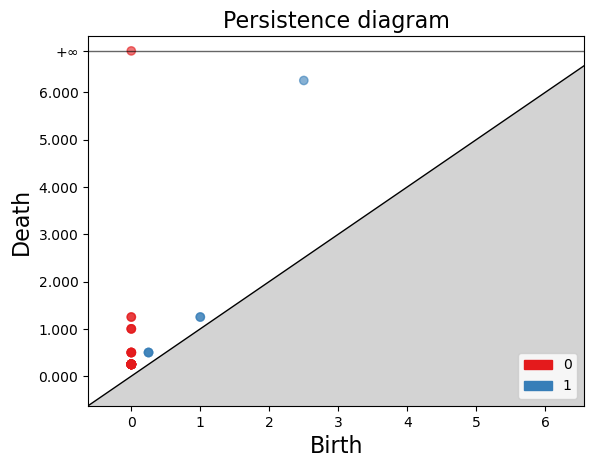

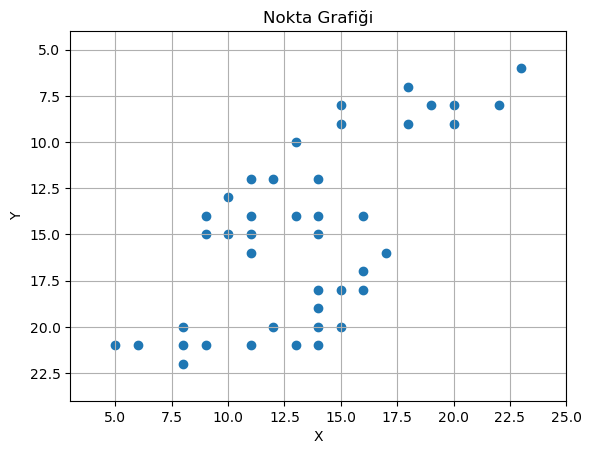

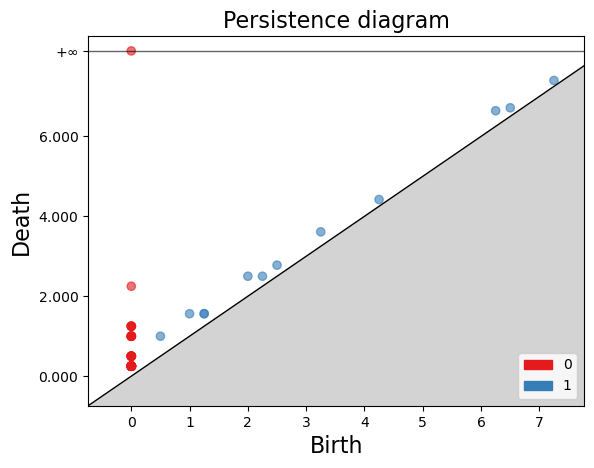

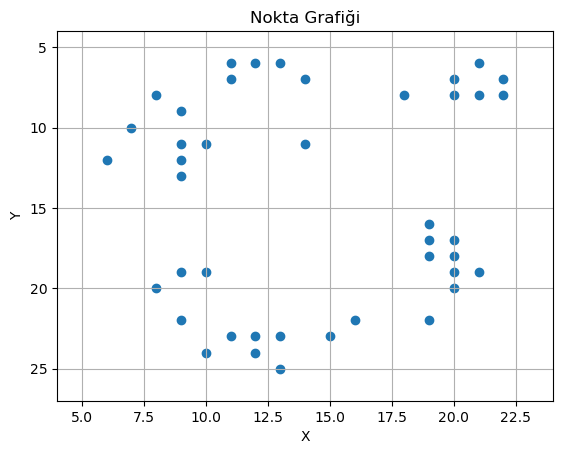

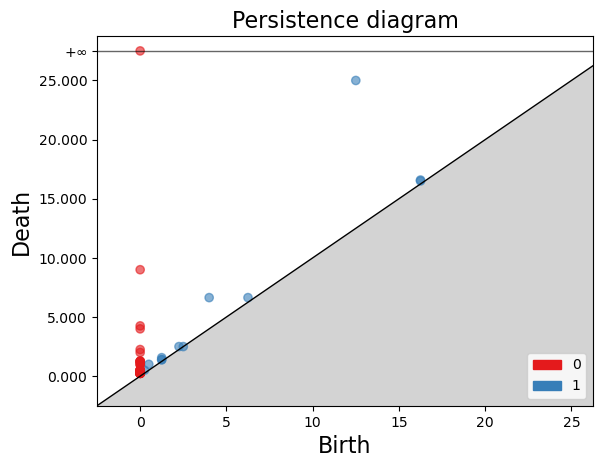

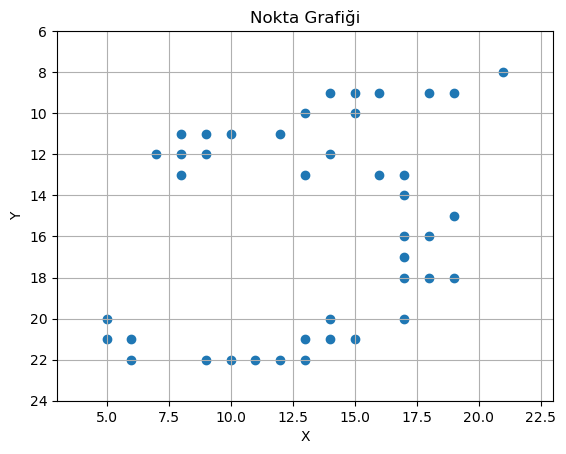

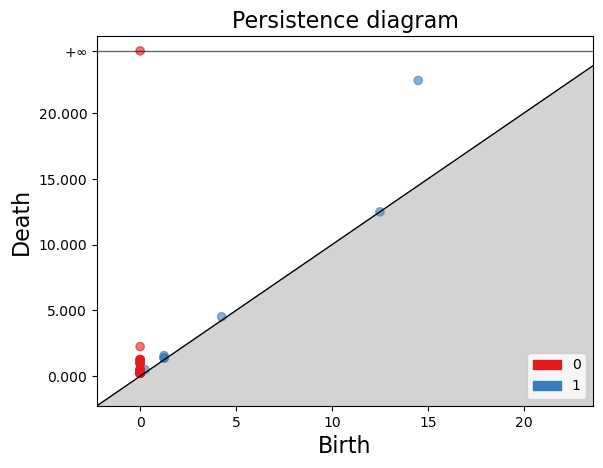

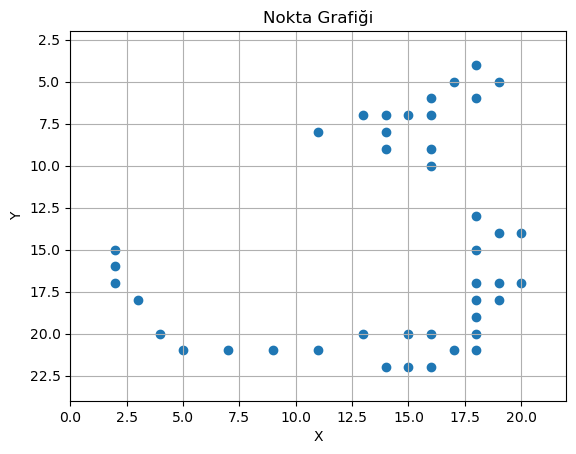

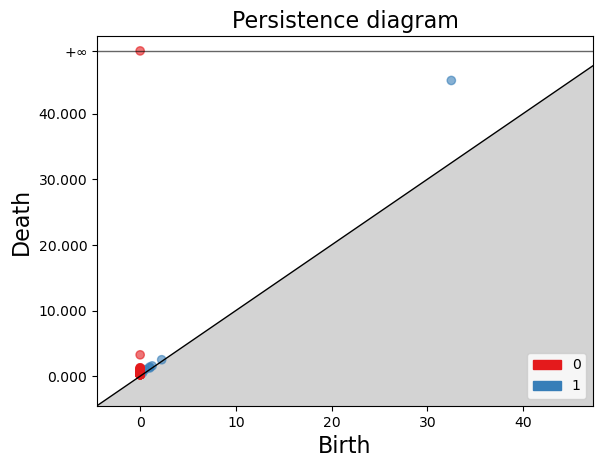

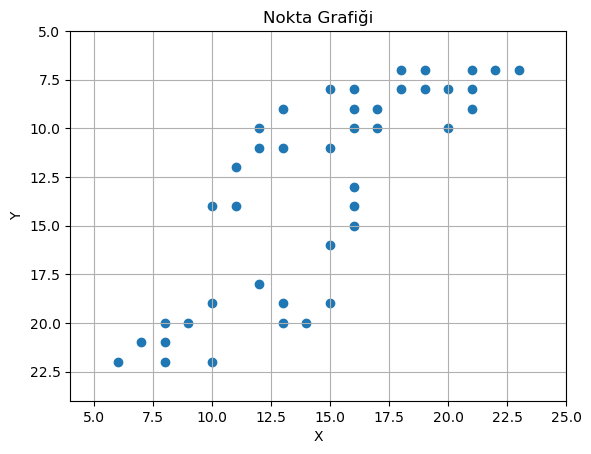

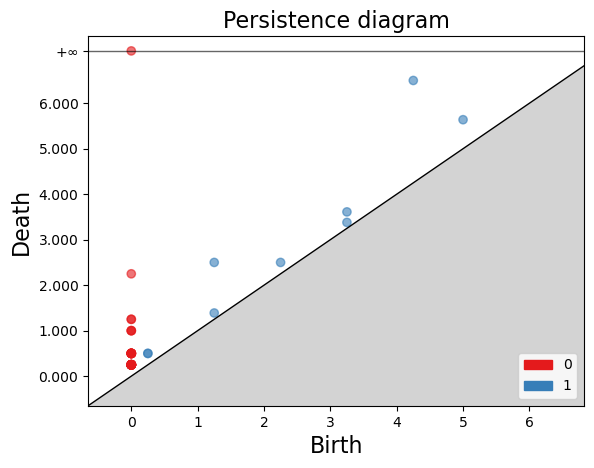

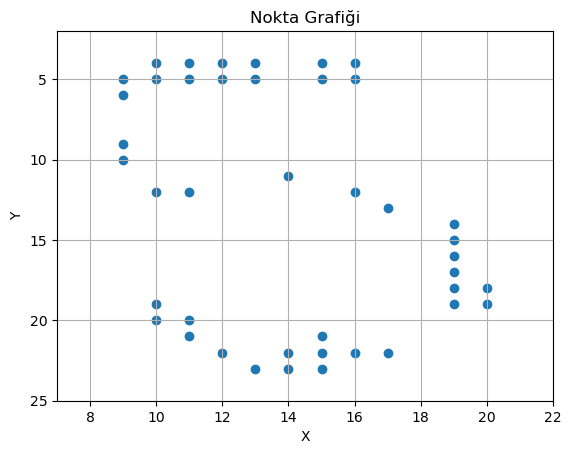

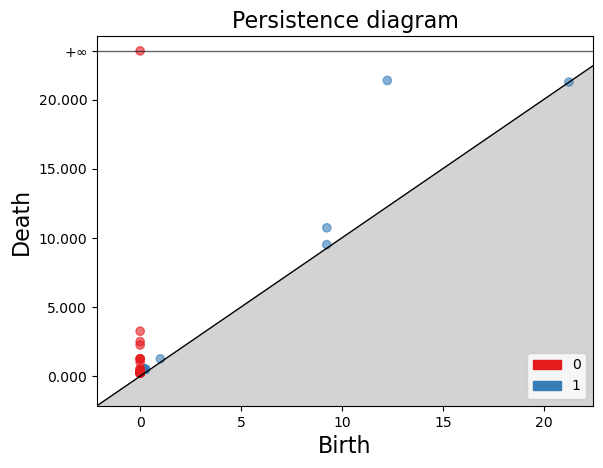

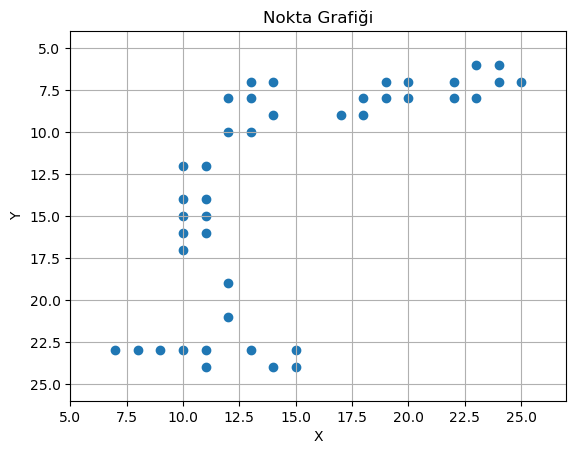

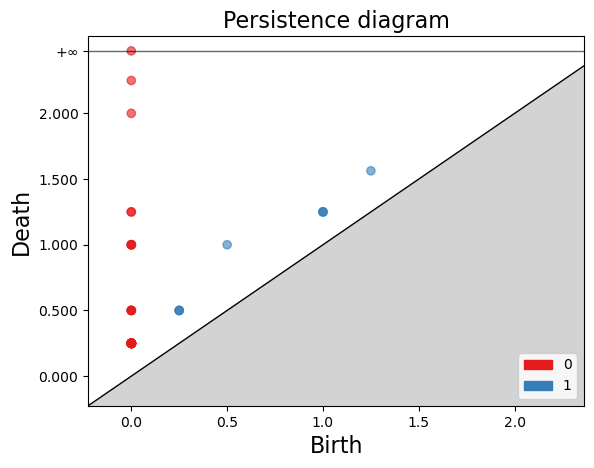

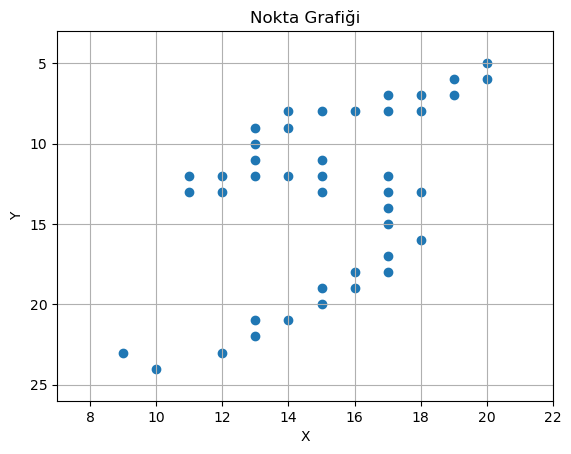

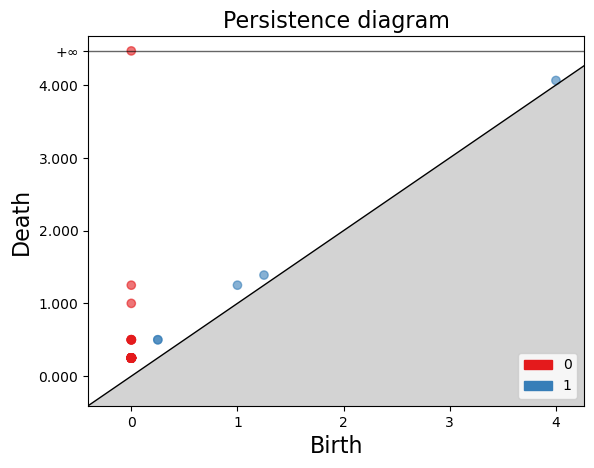

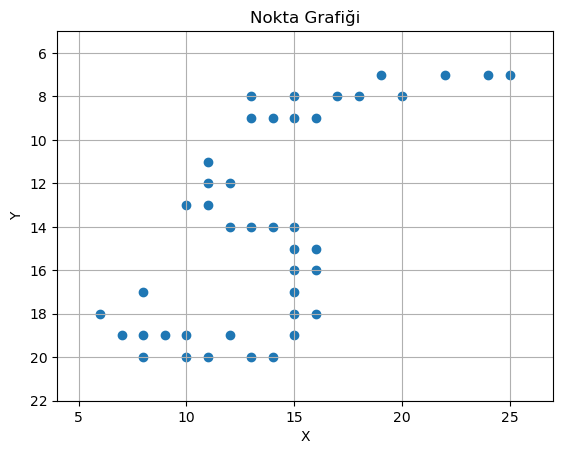

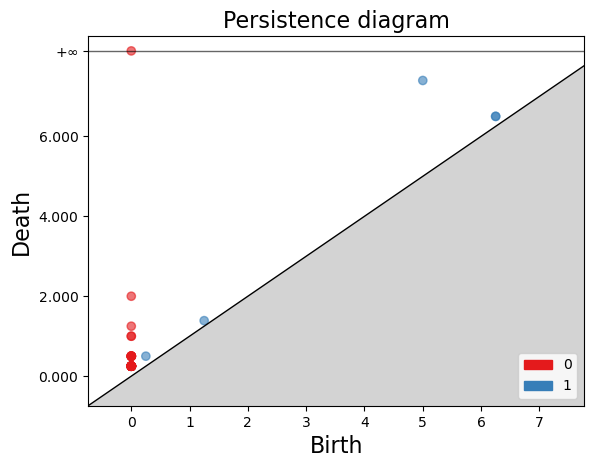

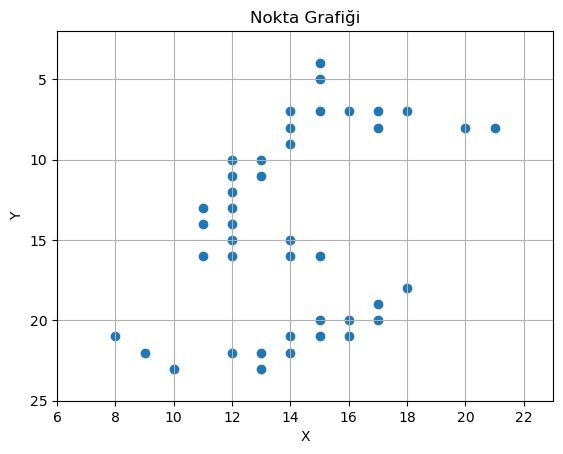

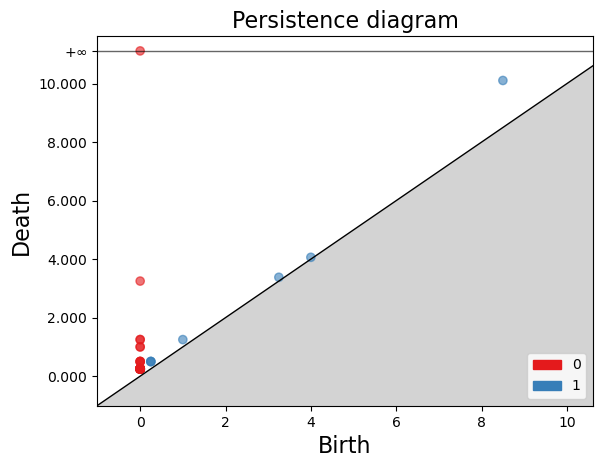

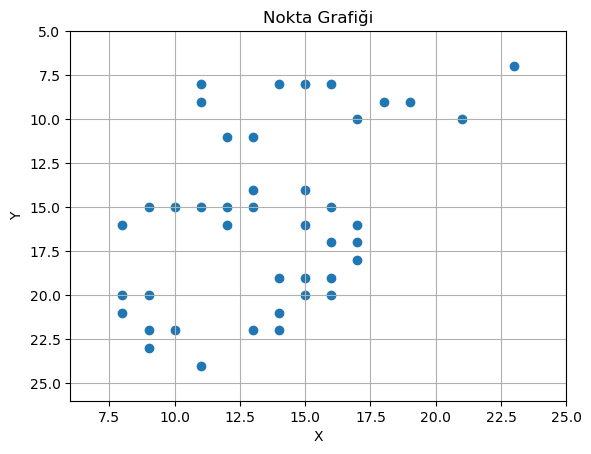

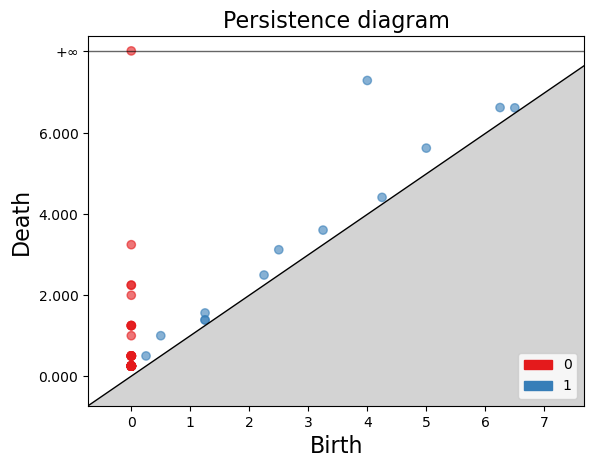

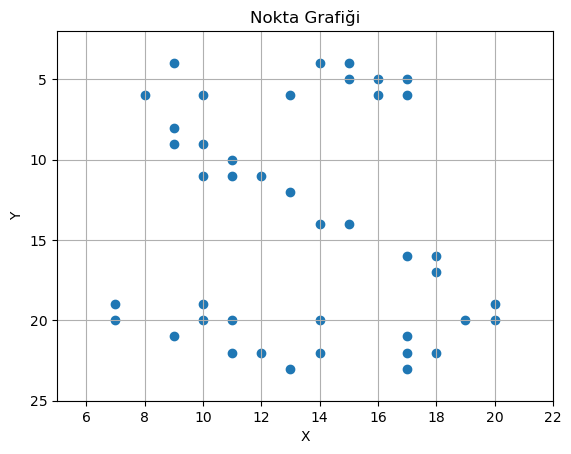

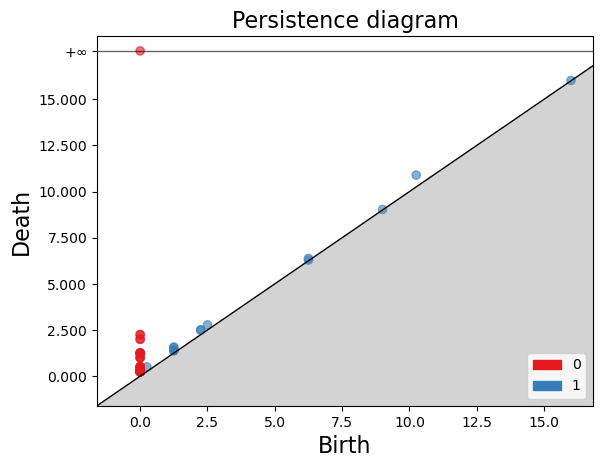

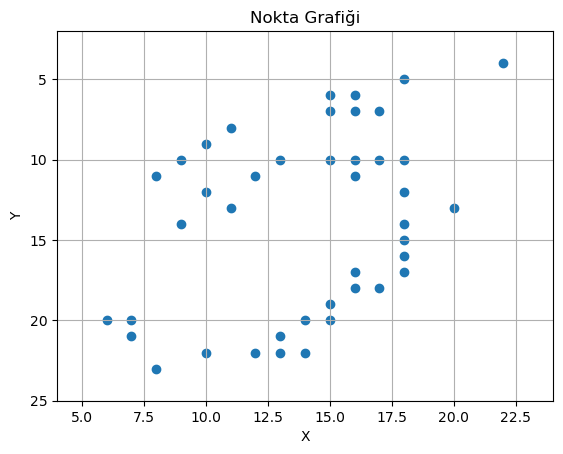

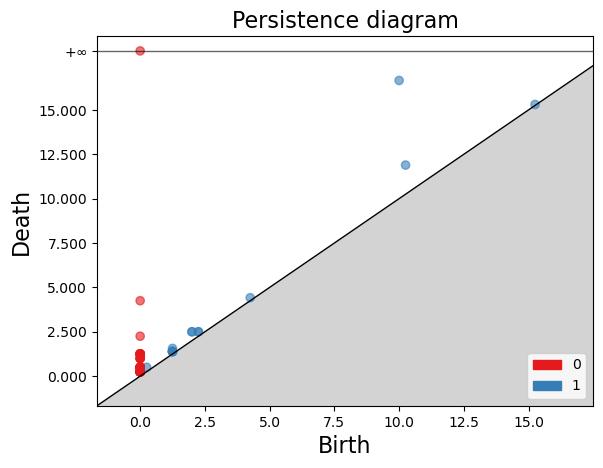

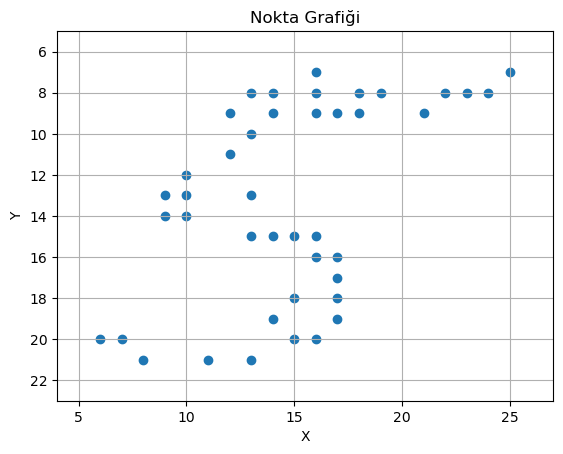

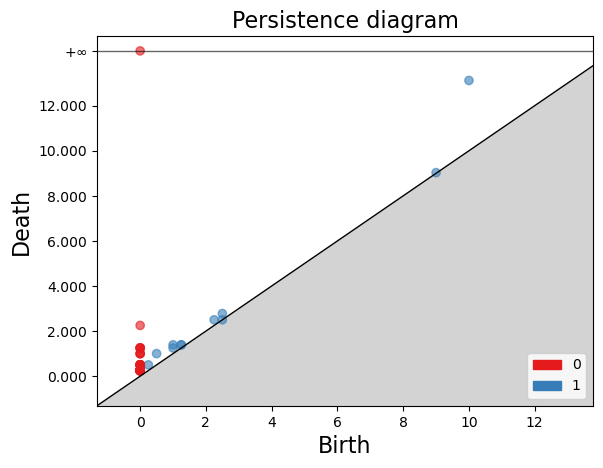

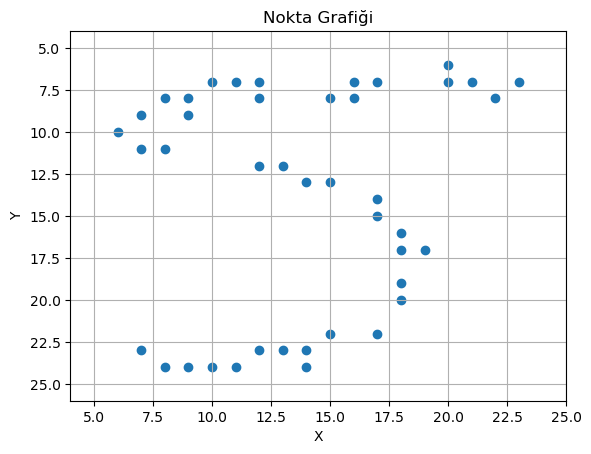

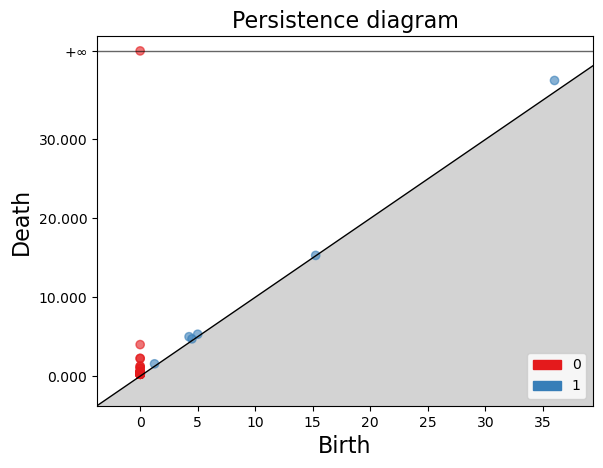

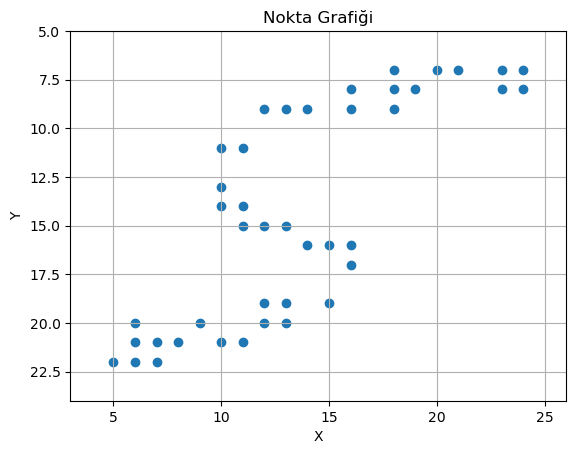

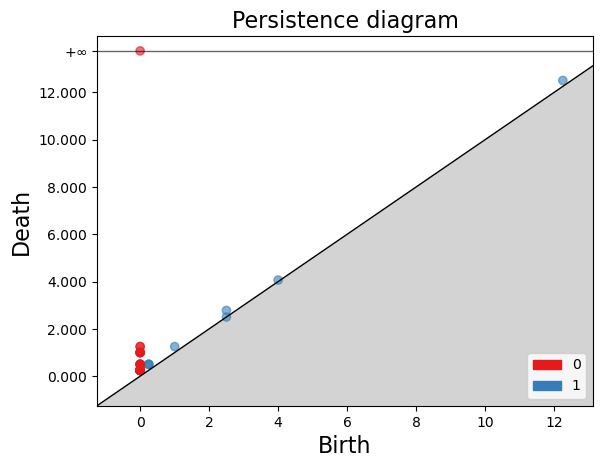

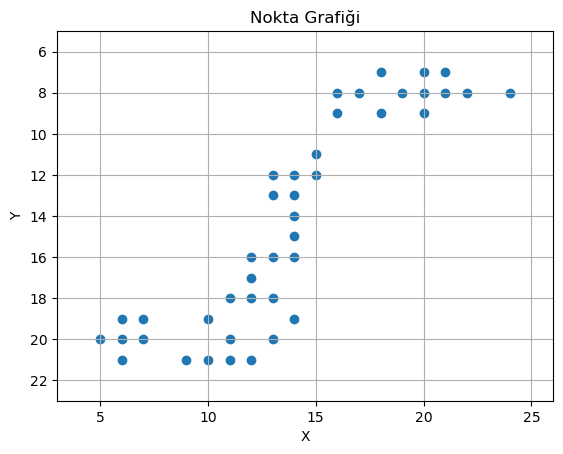

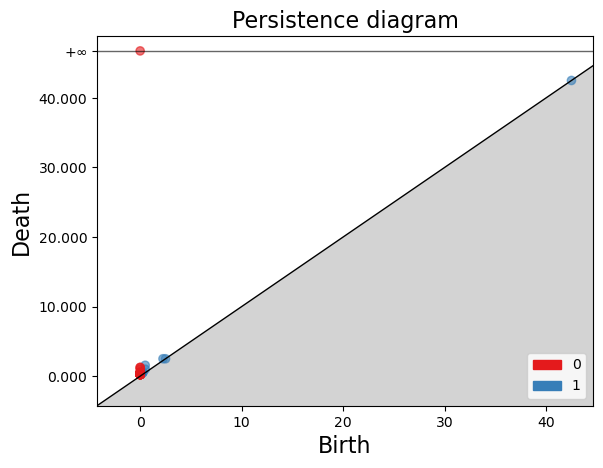

In [43]:
get_20_pd(5)

Hesaplamak uzun sürdüğü için küçük bir train test dataasıyla bir classifier train edelim


In [31]:
train_size, test_size = 60, 10

# Reshape to (n_samples, n_pixels_x, n_pixels_y)
X = np.array(X).reshape((-1, 28, 28))

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=train_size, test_size=test_size, stratify=Y, random_state=666
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (60, 28, 28), y_train shape: (60,)
X_test shape: (10, 28, 28), y_test shape: (10,)


In [32]:

# Reshape to (n_samples, n_pixels_x * n_pixels_y)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=666)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy}")


Random Forest Classifier Results:
Accuracy: 0.4


Az data ve az bilgiyle accuracy düşük çıktı. Train edilen sete alphacomplexleri ekleyip onlar üzerinden bir sınıflandırma yapalım

In [33]:
def compute_simplex_trees(data):
    simplex_trees = []

    for points in data:
        points_reshaped = points.reshape((-1, 1))
        alpha_complex = gd.AlphaComplex(points_reshaped.tolist())
        simplex_tree = alpha_complex.create_simplex_tree()
        simplex_trees.append(simplex_tree.get_filtration())

    return simplex_trees

In [34]:
X_train_st=compute_simplex_trees(X_train)
X_test_st=compute_simplex_trees(X_test)

In [36]:
steps = [
    ("binarizer", Binarizer(threshold=0.4)),
    ("diagram", CubicalPersistence()),
    ("rescaling", Scaler()),
    ("amplitude", Amplitude(metric="heat", metric_params={'sigma':0.15, 'n_bins':60}))
]

heat_pipeline = Pipeline(steps)

In [38]:
im_pipeline = heat_pipeline.fit_transform(im)
im_pipeline

array([[0.        , 1.49944247]])

In [39]:
direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

class HeightFiltrationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, direction):
        self.direction = direction
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return HeightFiltration(direction=np.array(self.direction), n_jobs=-1).fit_transform(X)


# Creating a list of all filtration transformer, we will be applying
filtration_list = [
    HeightFiltrationTransformer(direction=direction) for direction in direction_list
]

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)]
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)


In [40]:
X_train=np.array(X_train).reshape((-1, 28, 28))
X_test=np.array(X_test).reshape((-1, 28, 28))
X_test.shape

(10, 28, 28)

In [45]:
X_train_tda = tda_union.fit_transform(X_train)
X_train_tda.shape


(60, 224)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)

X_test_tda = tda_union.transform(X_test)
rf.score(X_test_tda, y_test)


0.8